In [26]:

from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [28]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [29]:

trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


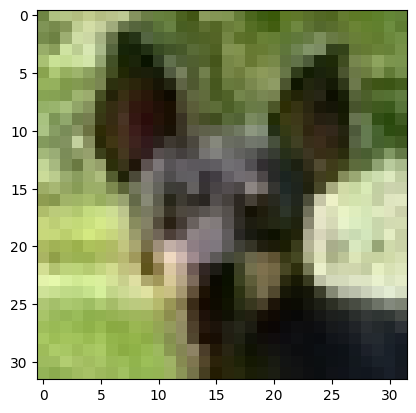

In [30]:

import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
idx = 2500
print(trans[y_train[idx]])
plt.imshow(x_train[idx])
     

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 512)        

In [32]:
# x: 0~1
# y: 配合loss這邊做Sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [33]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")


In [34]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 22s 48ms/step - loss: 1.5671 - accuracy: 0.4218 - val_loss: 1.2328 - val_accuracy: 0.5602
Epoch 2/40
450/450 [==============================] - 13s 28ms/step - loss: 1.1084 - accuracy: 0.6054 - val_loss: 0.9845 - val_accuracy: 0.6552
Epoch 3/40
450/450 [==============================] - 9s 21ms/step - loss: 0.8661 - accuracy: 0.6955 - val_loss: 0.8190 - val_accuracy: 0.7122
Epoch 4/40
450/450 [==============================] - 15s 33ms/step - loss: 0.7333 - accuracy: 0.7440 - val_loss: 0.7364 - val_accuracy: 0.7428
Epoch 5/40
450/450 [==============================] - 14s 31ms/step - loss: 0.6248 - accuracy: 0.7818 - val_loss: 0.6869 - val_accuracy: 0.7638
Epoch 6/40
450/450 [==============================] - 12s 27ms/step - loss: 0.5320 - accuracy: 0.8156 - val_loss: 0.6639 - val_accuracy: 0.7756
Epoch 7/40
450/450 [==============================] - 11s 26ms/step - loss: 0.4511 - accuracy: 0.8429 - val_loss: 0.7518 - val_accuracy: 

In [35]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.7797


[0.6990005373954773, 0.779699981212616]

In [36]:

from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])

,airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),858,20,35,4,8,11,8,7,32,17
automobile(true),9,929,4,5,1,3,4,1,12,32
bird(true),65,8,743,27,40,38,58,15,2,4
cat(true),32,14,101,484,53,193,60,47,6,10
deer(true),20,5,102,34,696,40,42,54,7,0
dog(true),16,4,56,79,35,722,20,60,5,3
frog(true),4,6,51,27,16,17,867,5,2,5
horse(true),16,2,40,16,32,46,4,838,3,3
ship(true),68,27,15,5,1,3,8,5,857,11
truck(true),33,100,12,6,2,13,6,9,16,803


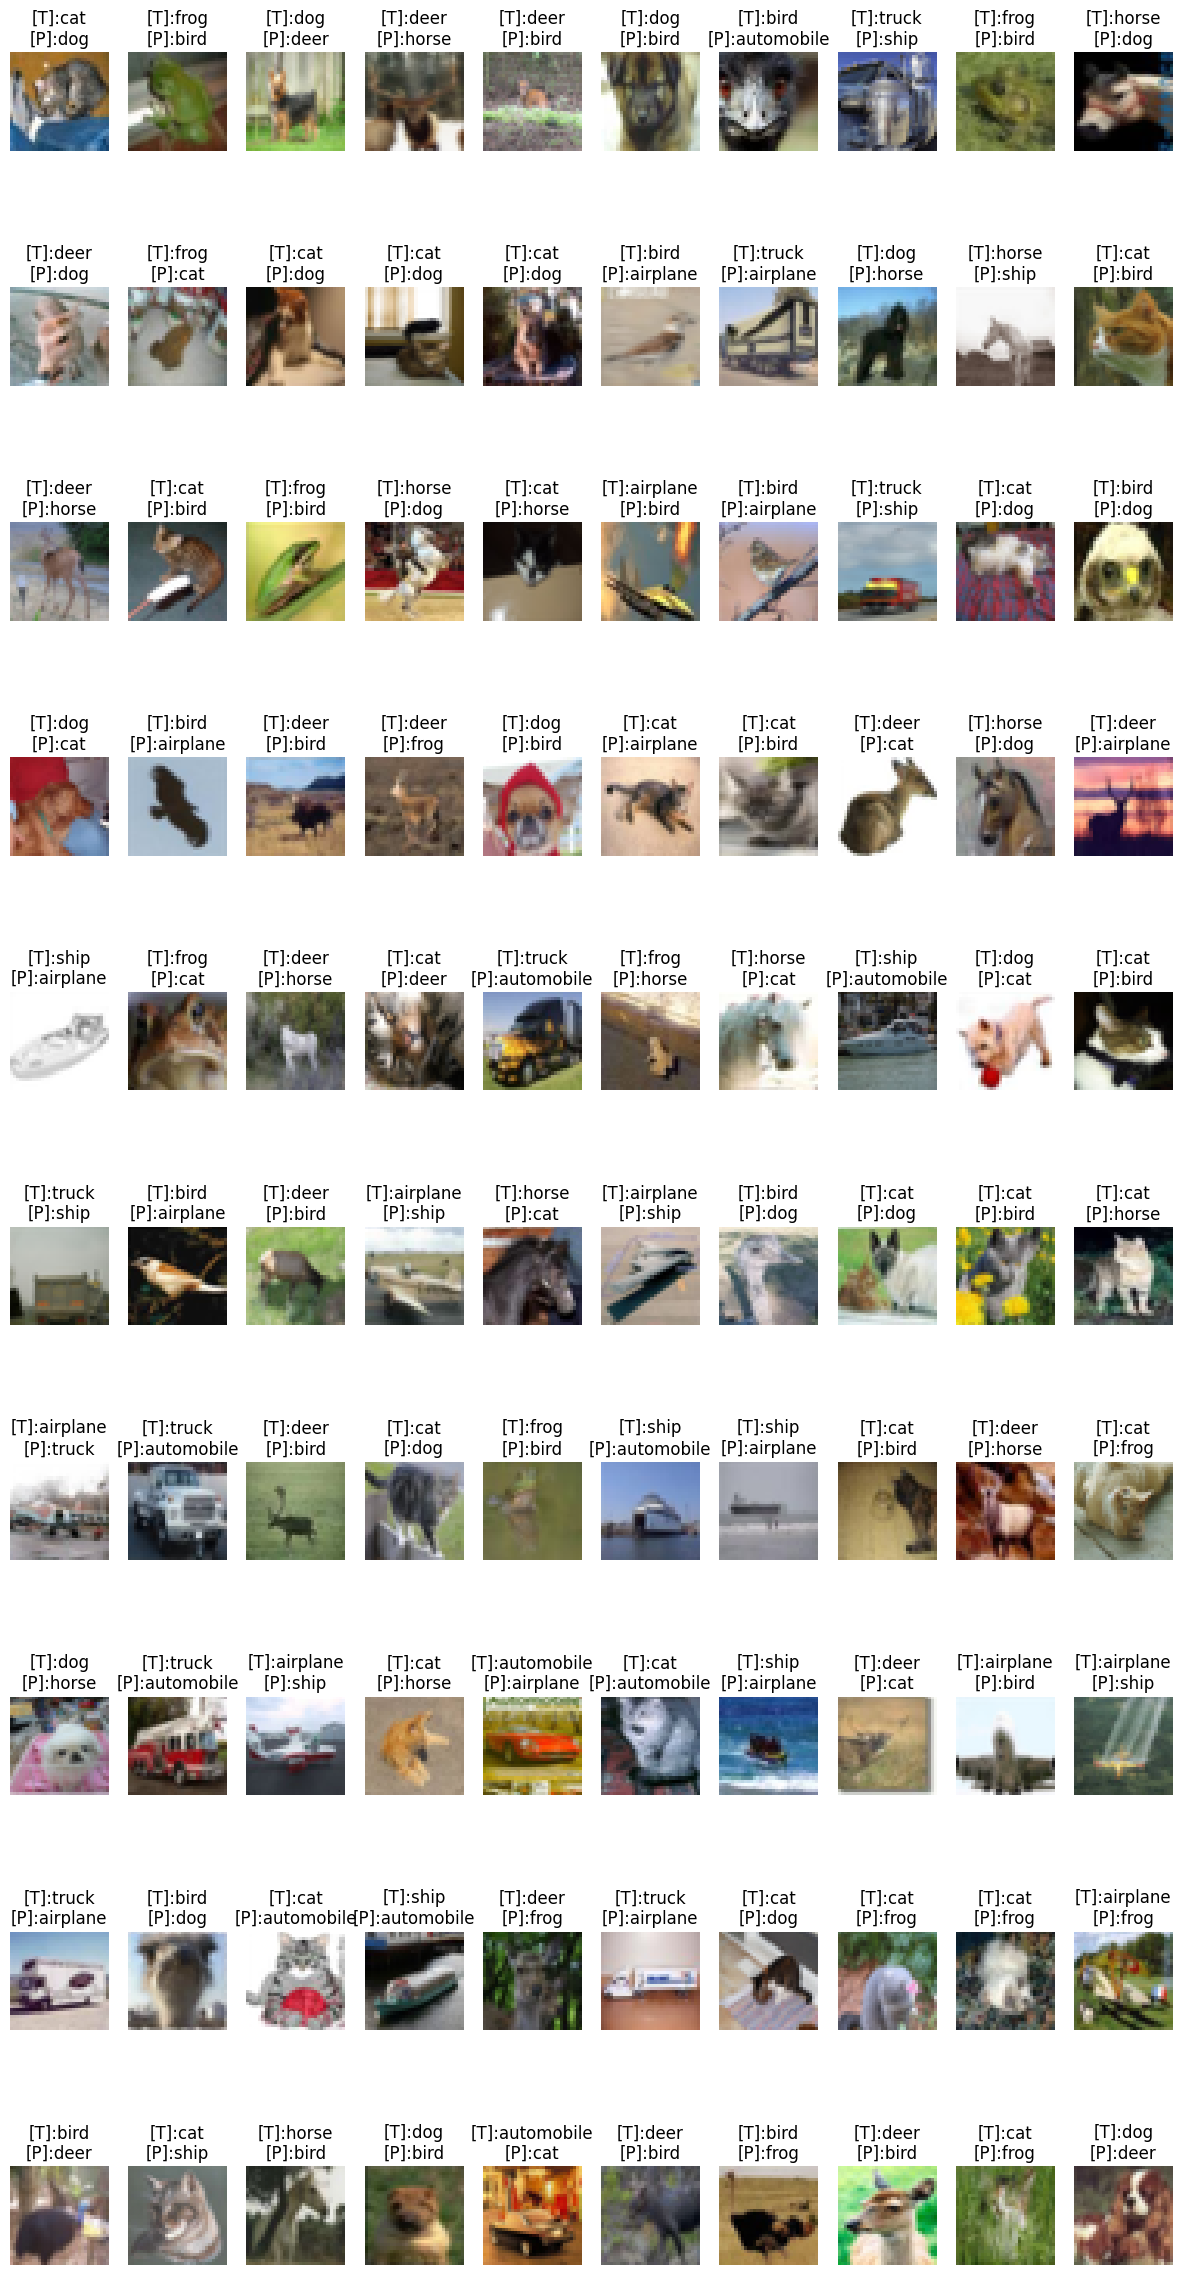

In [37]:

import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])

airplane 的機率是: 0.0013
automobile 的機率是: 0.0
bird 的機率是: 0.0018
cat 的機率是: 0.8814
deer 的機率是: 1e-04
dog 的機率是: 0.1147
frog 的機率是: 1e-04
horse 的機率是: 0.0005
ship 的機率是: 0.0
truck 的機率是: 1e-04
最高機率是: cat


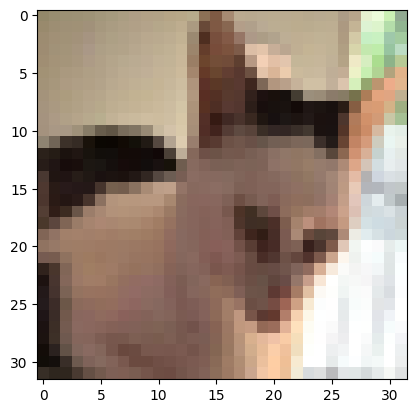

In [38]:
import requests
from PIL import Image
url = "https://pic3.zhimg.com/v2-9d0b8e3899df1a4f70f4b3f069dbb1fe_b.jpg" #@param {type:"string"}
response = requests.get(url, stream=True)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)
     

C:\Users\TheSal\AppData\Local\Temp\ipykernel_58608\3398783082.py:27: RuntimeWarning: invalid value encountered in divide
  fil = (fil - mi) / (ma - mi)


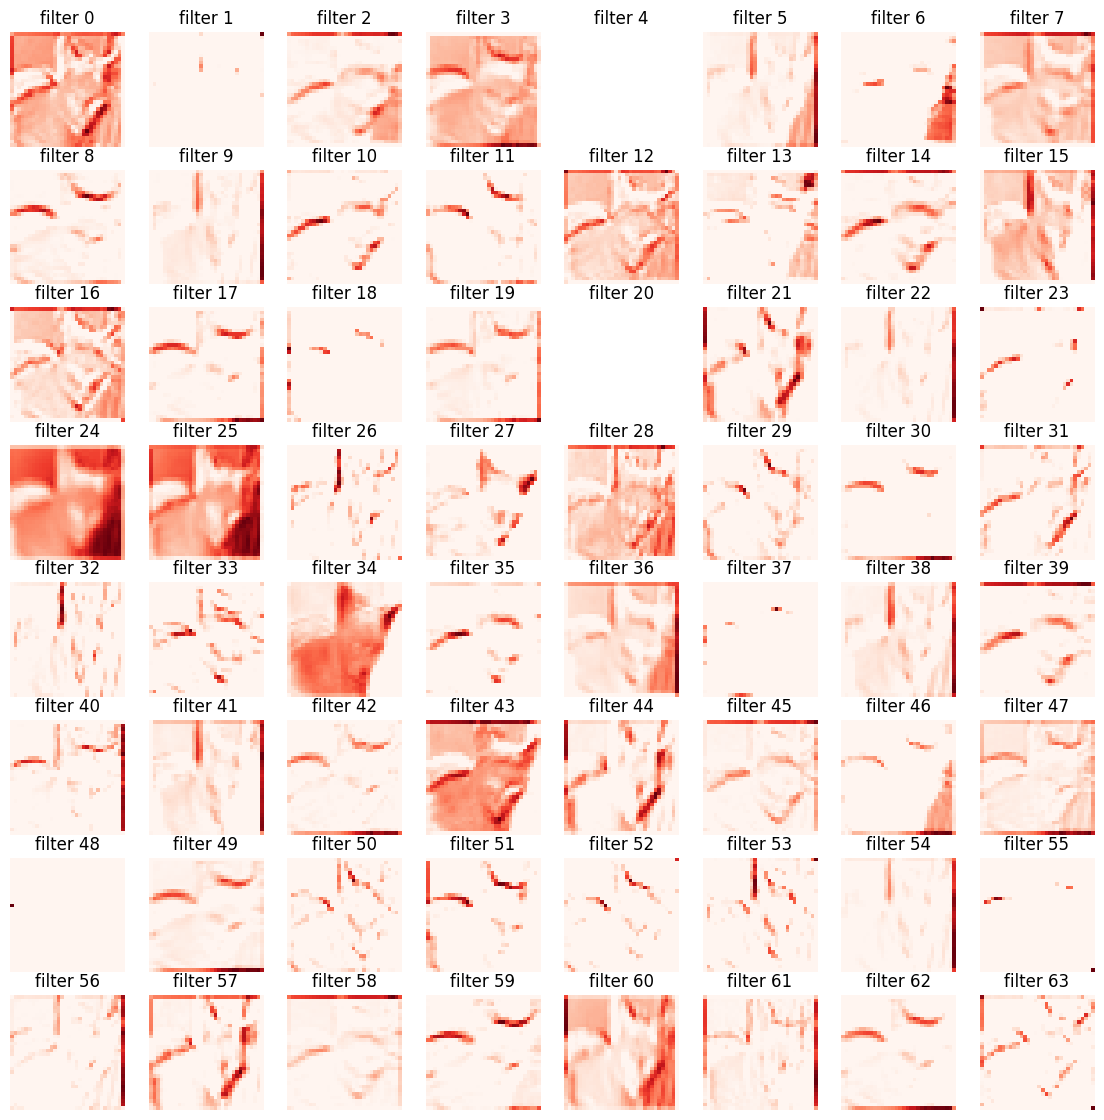

In [39]:

# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")